In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import pickle
from enum import Enum
import seaborn as sns

In [4]:
!ls ../data

sample_submission_wBWLI0s.csv  test.csv  train.csv


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
train = pd.read_csv("../data/train.csv")

In [14]:
train.head(1).T

0
row_id                                    1
scout_id                                 13
rating_num                              7.0
winner                               winner
team                                  team1
competitionId                             8
player_position_1                       7.0
player_position_2                       7.0
player_height                      0.317073
player_weight                          0.48
player_general_var_0                    0.0
player_general_var_1                      0
player_general_var_2                    0.0
player_general_var_3                    0.0
player_general_var_4               0.114754
player_general_var_5                    0.0
player_positional_raw_var_0             0.0
player_positional_raw_var_1             0.0
player_positional_raw_var_2             0.0
player_positional_raw_var_3             0.0
player_defensive_raw_var_4              0.0
player_defensive_raw_var_5              0.0
player_other_raw_var_6              0.46755
player_offensive_raw_var_7              0.0
player_other_raw_var_8                  0.0
player_other_raw_var_9                  0.0
player_other_raw_var_10                 0.0
player_offensive_raw_var_11             0.0
player_other_raw_var_12                 0.0
player_other_raw_var_13                 0.0
player_other_raw_var_14                 0.0
player_positional_raw_var_15            0.0
player_positional_raw_var_16            0.0
player_positional_raw_var_17            0.0
player_other_raw_var_18                 0.0
player_other_raw_var_19                 0.0
player_other_raw_var_20                 0.0
player_positional_raw_var_21            0.0
player_positional_raw_var_22            0.0
player_positional_raw_var_23            0.0
player_other_raw_var_24                 0.0
player_other_raw_var_25                 0.0
player_other_raw_var_26                 0.0
player_other_raw_var_27                 0.0
player_other_raw_var_28                 0.0
player_other_raw_var_29                 0.0
player_other_raw_var_30                0.25
player_offensive_raw_var_31        0.142857
player_offensive_raw_var_32             0.0
player_other_raw_var_33                 0.0
player_other_raw_var_34            0.090909
player_other_raw_var_35                 0.0
player_other_raw_var_36                 0.0
player_other_raw_var_37                 0.0
player_other_raw_var_38            0.294118
player_other_raw_var_39                 0.0
player_other_raw_var_40                 0.0
player_other_raw_var_41                 0.0
player_defensive_raw_var_42             0.0
player_defensive_raw_var_43             0.0
player_other_raw_var_44              0.0625
player_other_raw_var_45                 0.0
player_offensive_raw_var_46             0.0
player_other_raw_var_47                 0.0
player_defensive_raw_var_48             0.0
player_offensive_raw_var_49             0.0
player_offensive_raw_var_50             0.0
player_other_raw_var_51                 0.0
player_defensive_raw_var_52             0.0
player_offensive_raw_var_53             0.0
player_other_raw_var_54                 0.0
player_positional_raw_var_55            0.0
player_other_raw_var_56                 0.4
player_other_raw_var_57            0.222222
player_other_raw_var_58                 0.0
player_other_raw_var_59            0.571429
player_offensive_raw_var_60             0.0
player_defensive_raw_var_61             0.0
player_defensive_raw_var_62             0.0
player_other_raw_var_63                 0.0
player_other_raw_var_64                 0.0
player_defensive_raw_var_65             0.0
player_defensive_raw_var_66             0.0
player_defensive_raw_var_67             0.0
player_other_raw_var_68            0.210526
player_other_raw_var_69                0.08
player_defensive_raw_var_70             0.0
player_general_raw_var_71               0.0
player_general_raw_var_72               0.0
player_offensive_raw_var_73             0.0
player_defensive_raw_var_74           

In [12]:
target = train['rating_num']

In [1]:
import sys
sys.path.insert(0, '../utils')
from utils.football_data_set_splitter import FootballDataSetSplitter
import utils.football_data_set as fds

In [2]:
splitter = FootballDataSetSplitter()

In [9]:
player_raw_general = splitter.get_player_data_set(
    stats_type=fds.StatsVariableType.RAW.value,
    var_type=fds.PlayerVariableType.GENERAL.value,
    add_common_cols=False
)

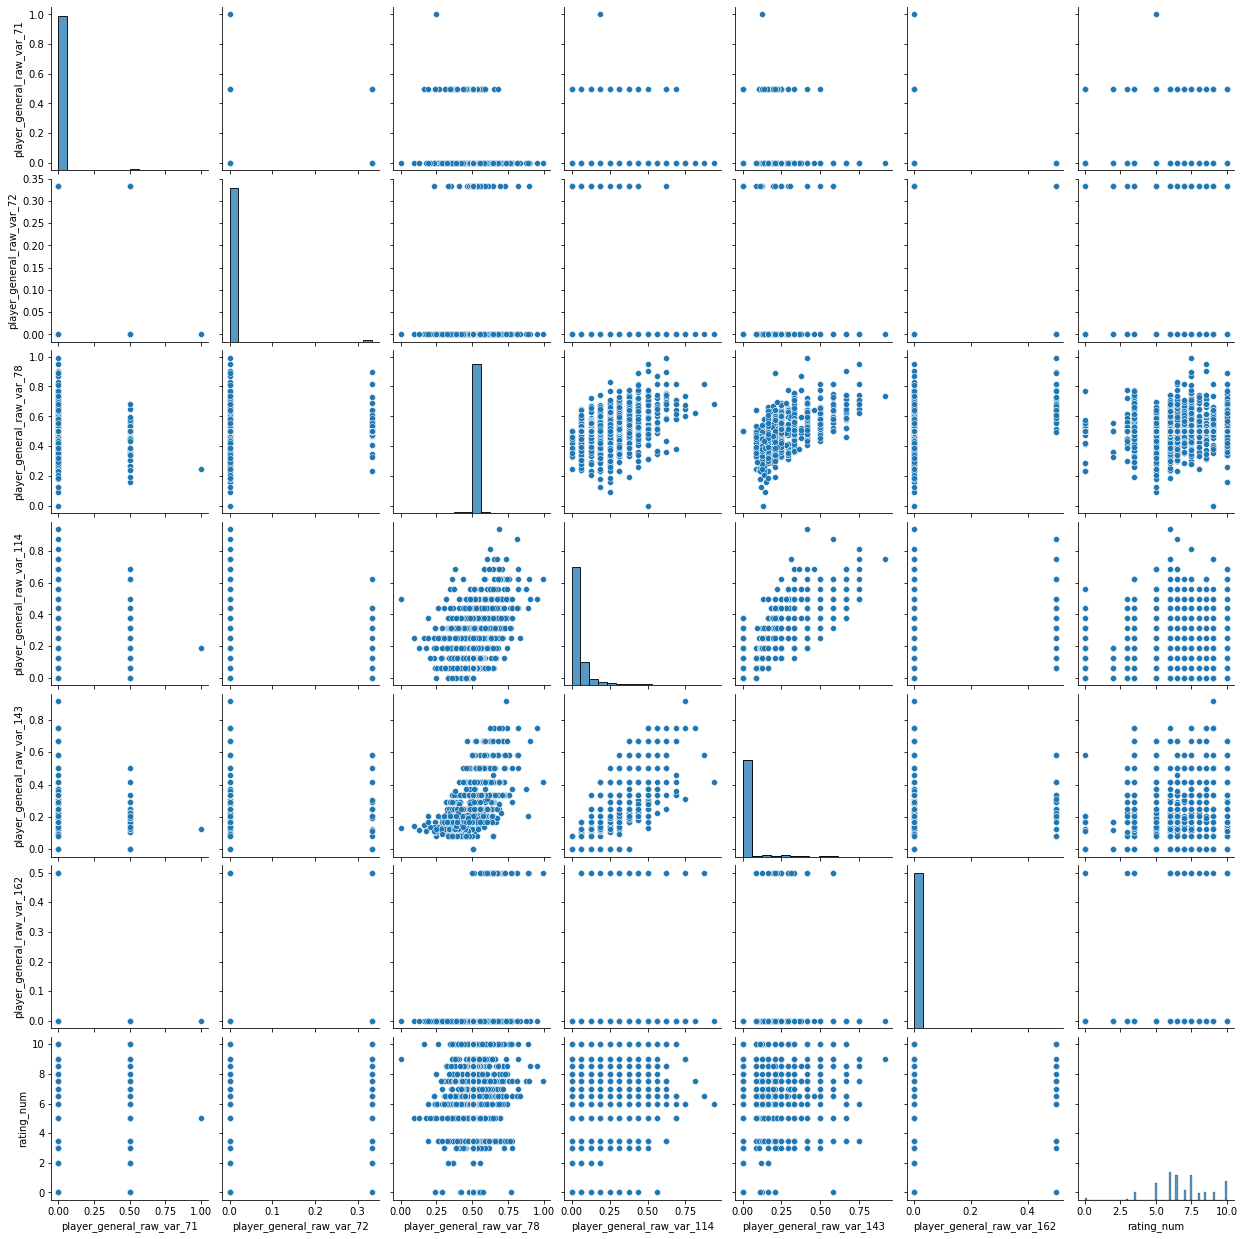

In [15]:
sns.pairplot(pd.concat([player_raw_general, target], axis=1))

In [16]:
player_raw_physical = splitter.get_player_data_set(
    stats_type=fds.StatsVariableType.RAW.value,
    var_type=fds.PlayerVariableType.PHYSICAL.value,
    add_common_cols=False
)

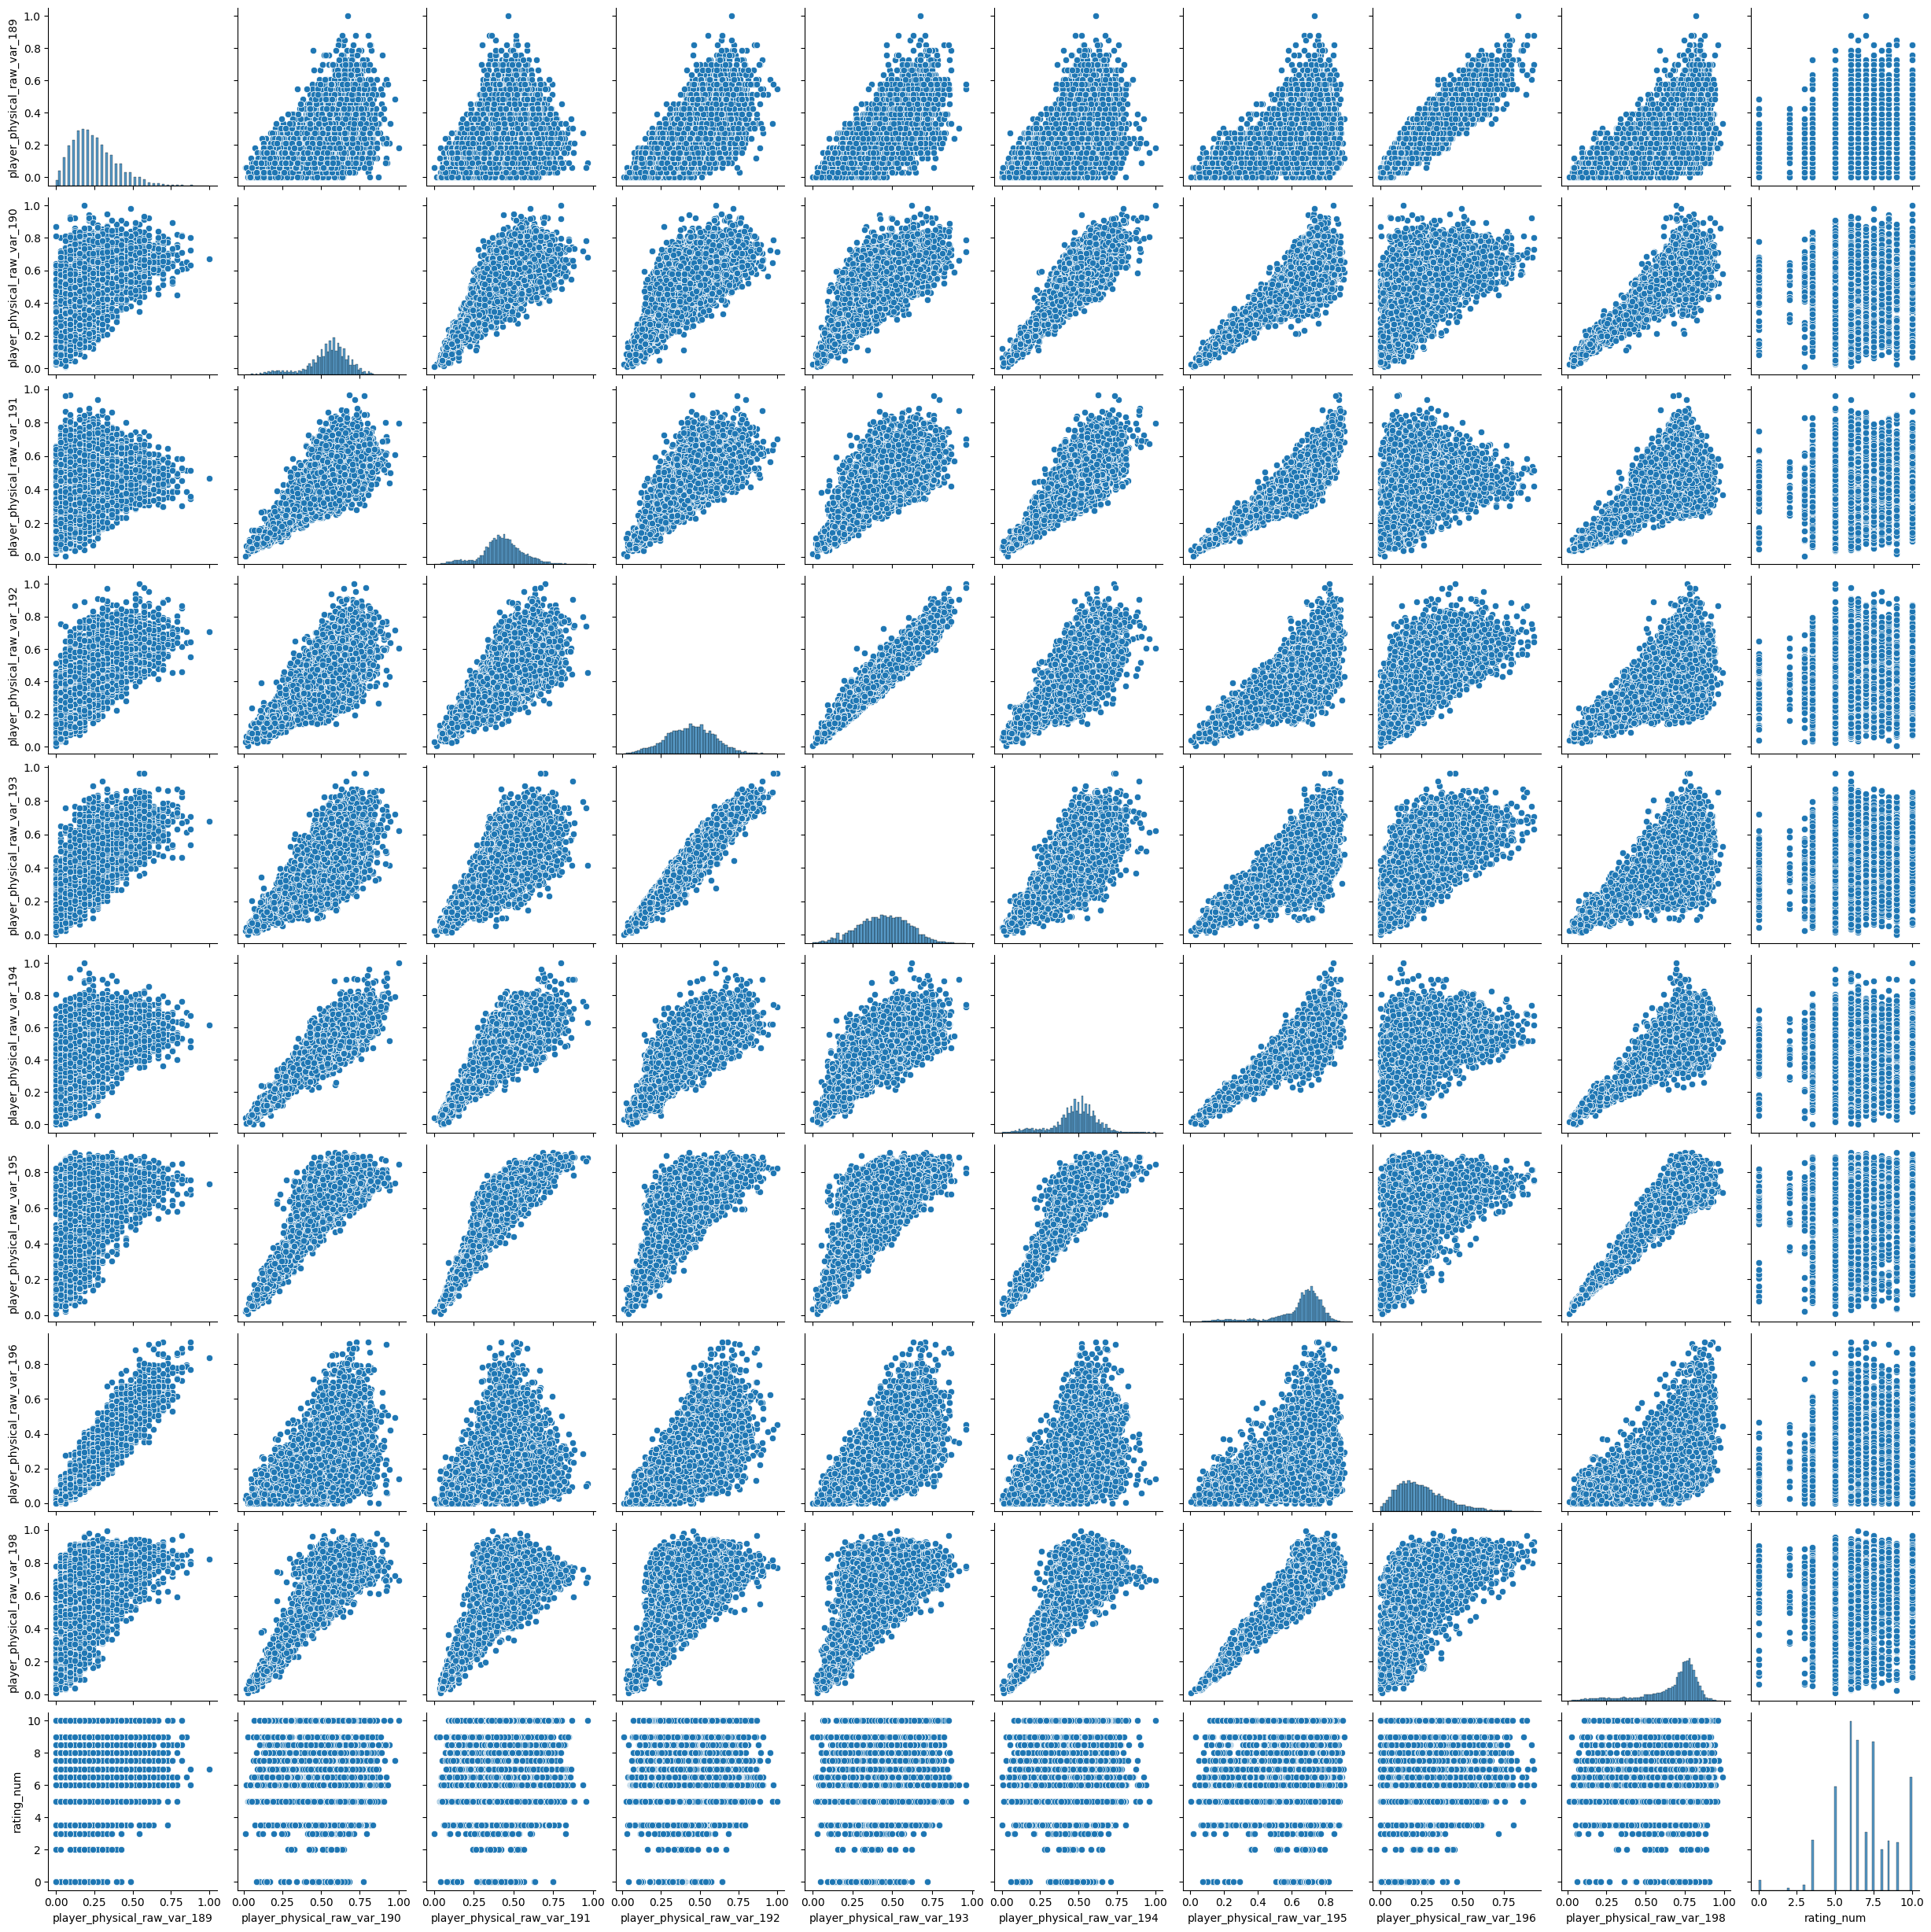

In [18]:
sns.pairplot(pd.concat([player_raw_physical, target], axis=1));

In [19]:
player_raw_defensive = splitter.get_player_data_set(
    stats_type=fds.StatsVariableType.RAW.value,
    var_type=fds.PlayerVariableType.DEFENSIVE.value,
    add_common_cols=False
)

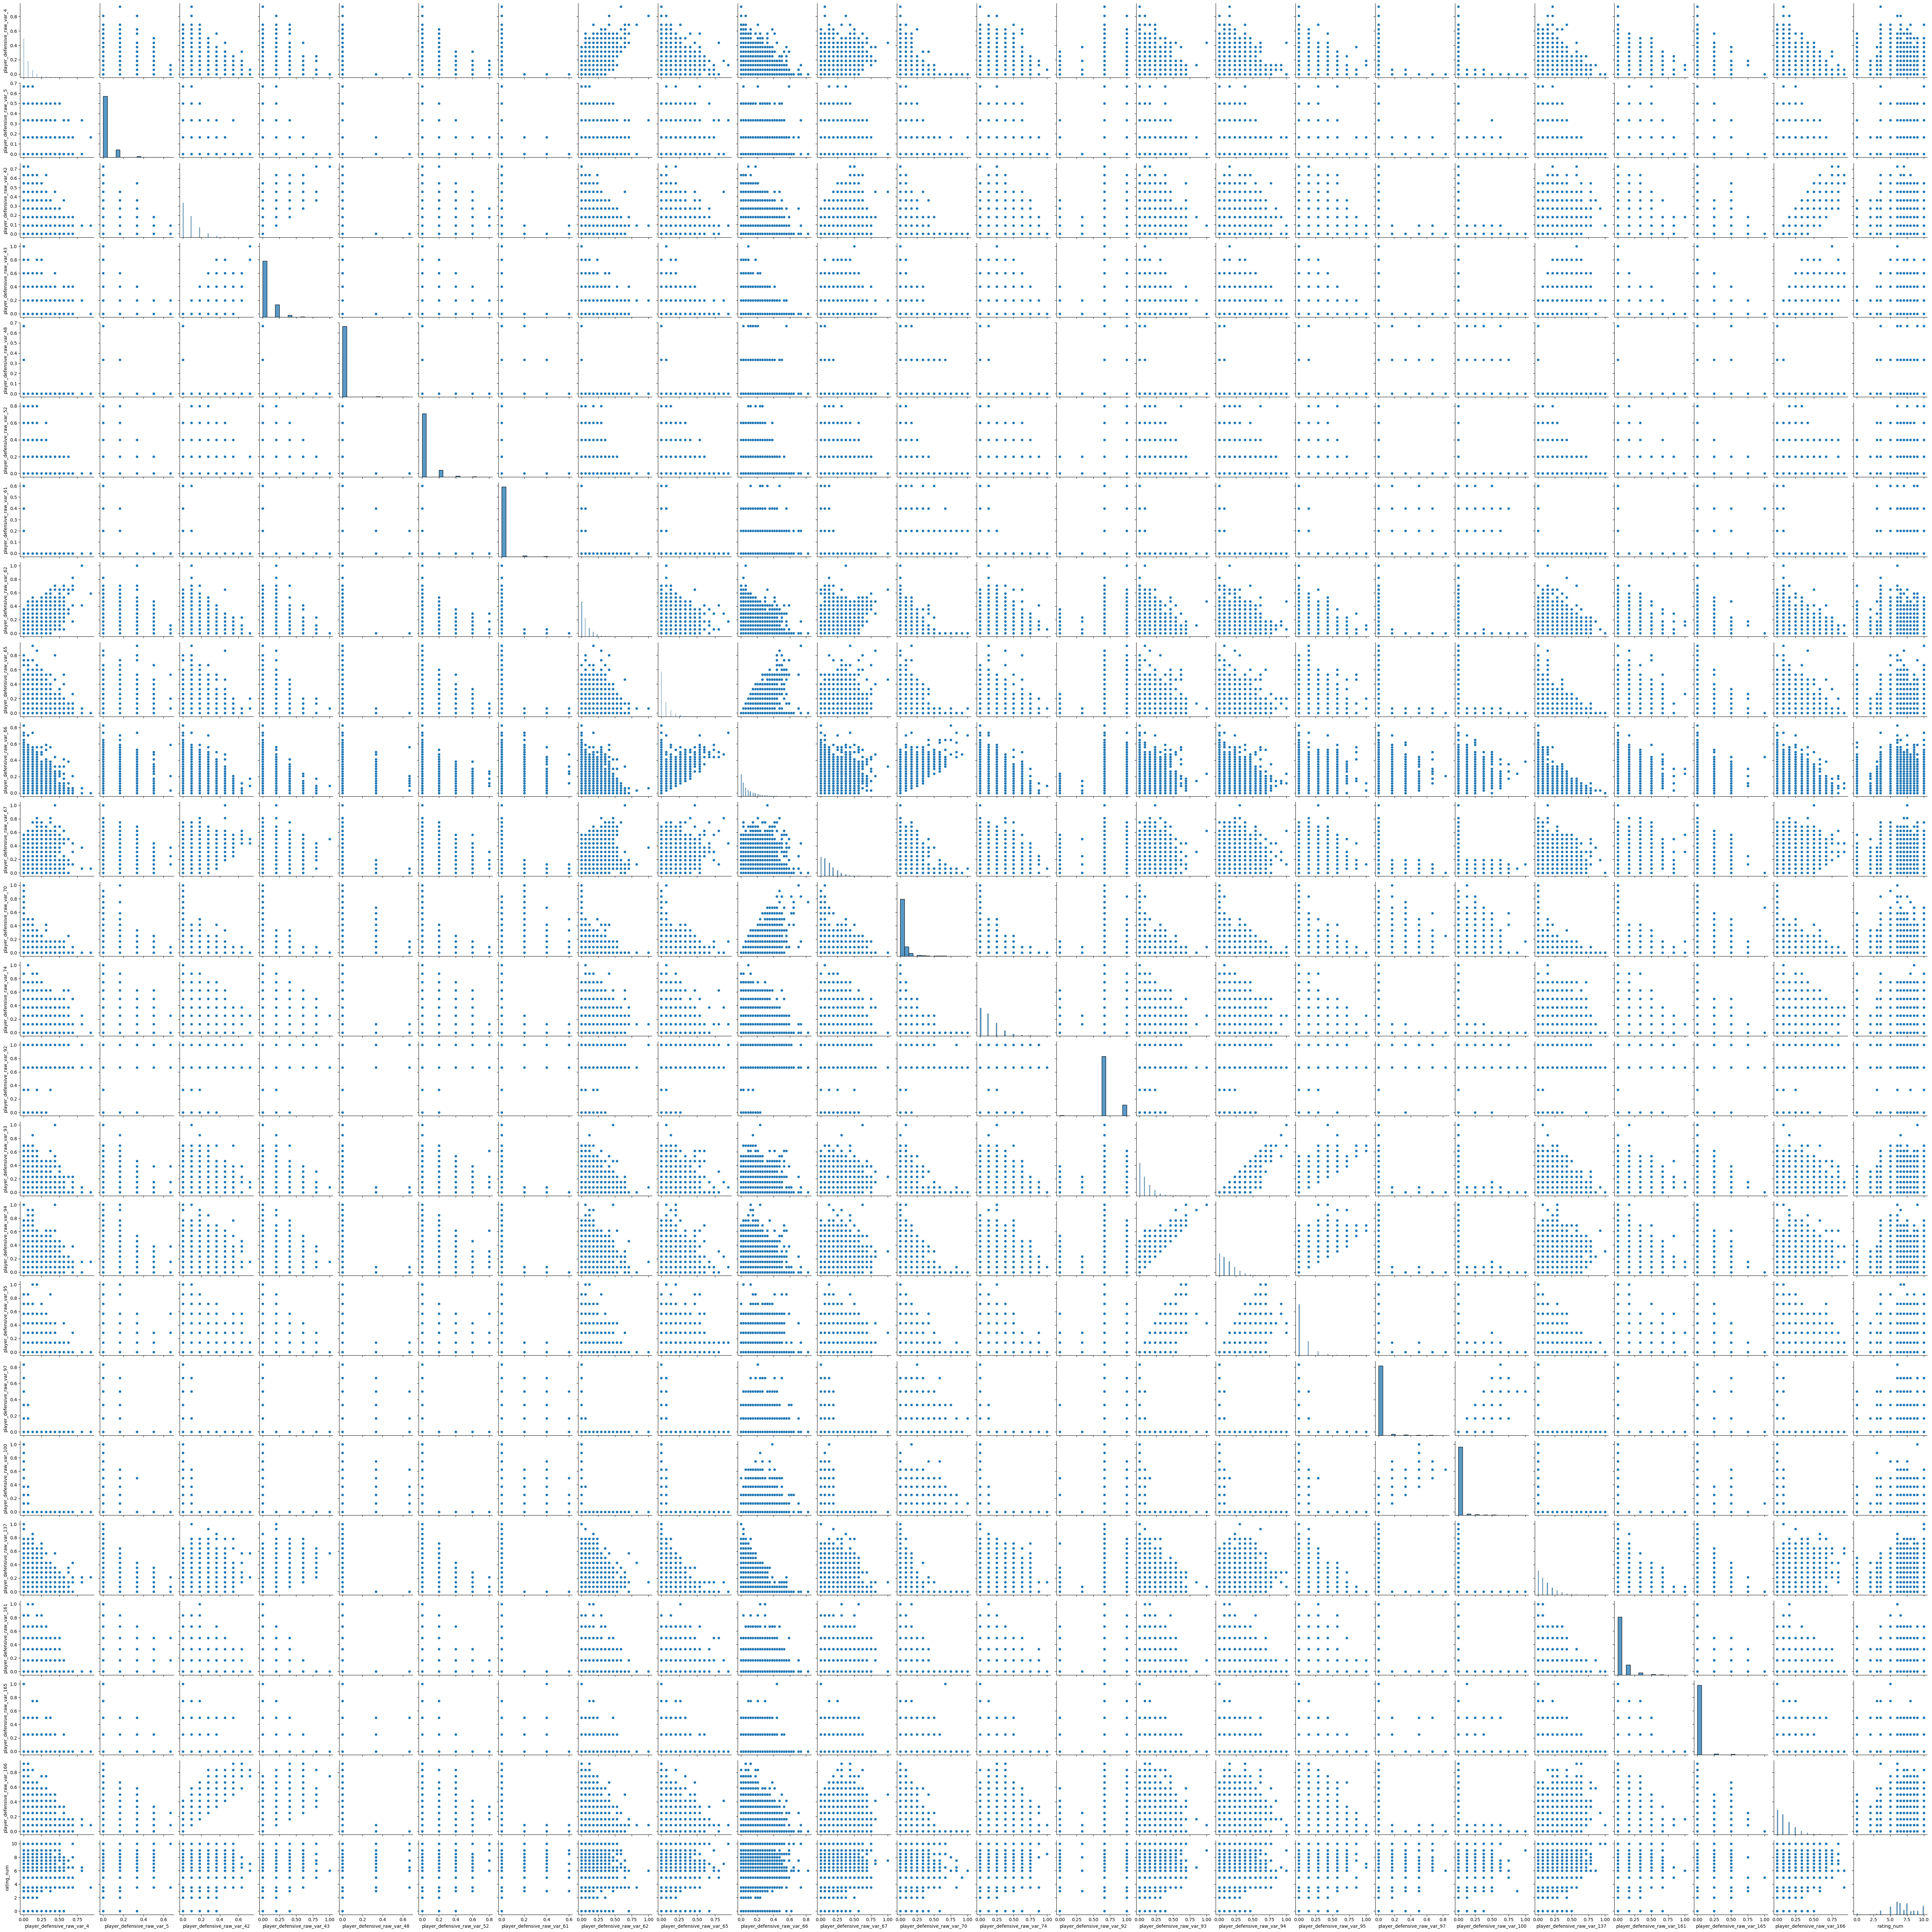

In [20]:
sns.pairplot(pd.concat([player_raw_defensive, target], axis=1));

In [21]:
team1_raw_offensive = splitter.get_team_data_set(
    team_type=fds.TeamType.FIRST.value,
    stats_type=fds.StatsVariableType.RAW.value,
    var_type=fds.TeamVariableType.OFFENSIVE.value,
    add_common_cols=False
)

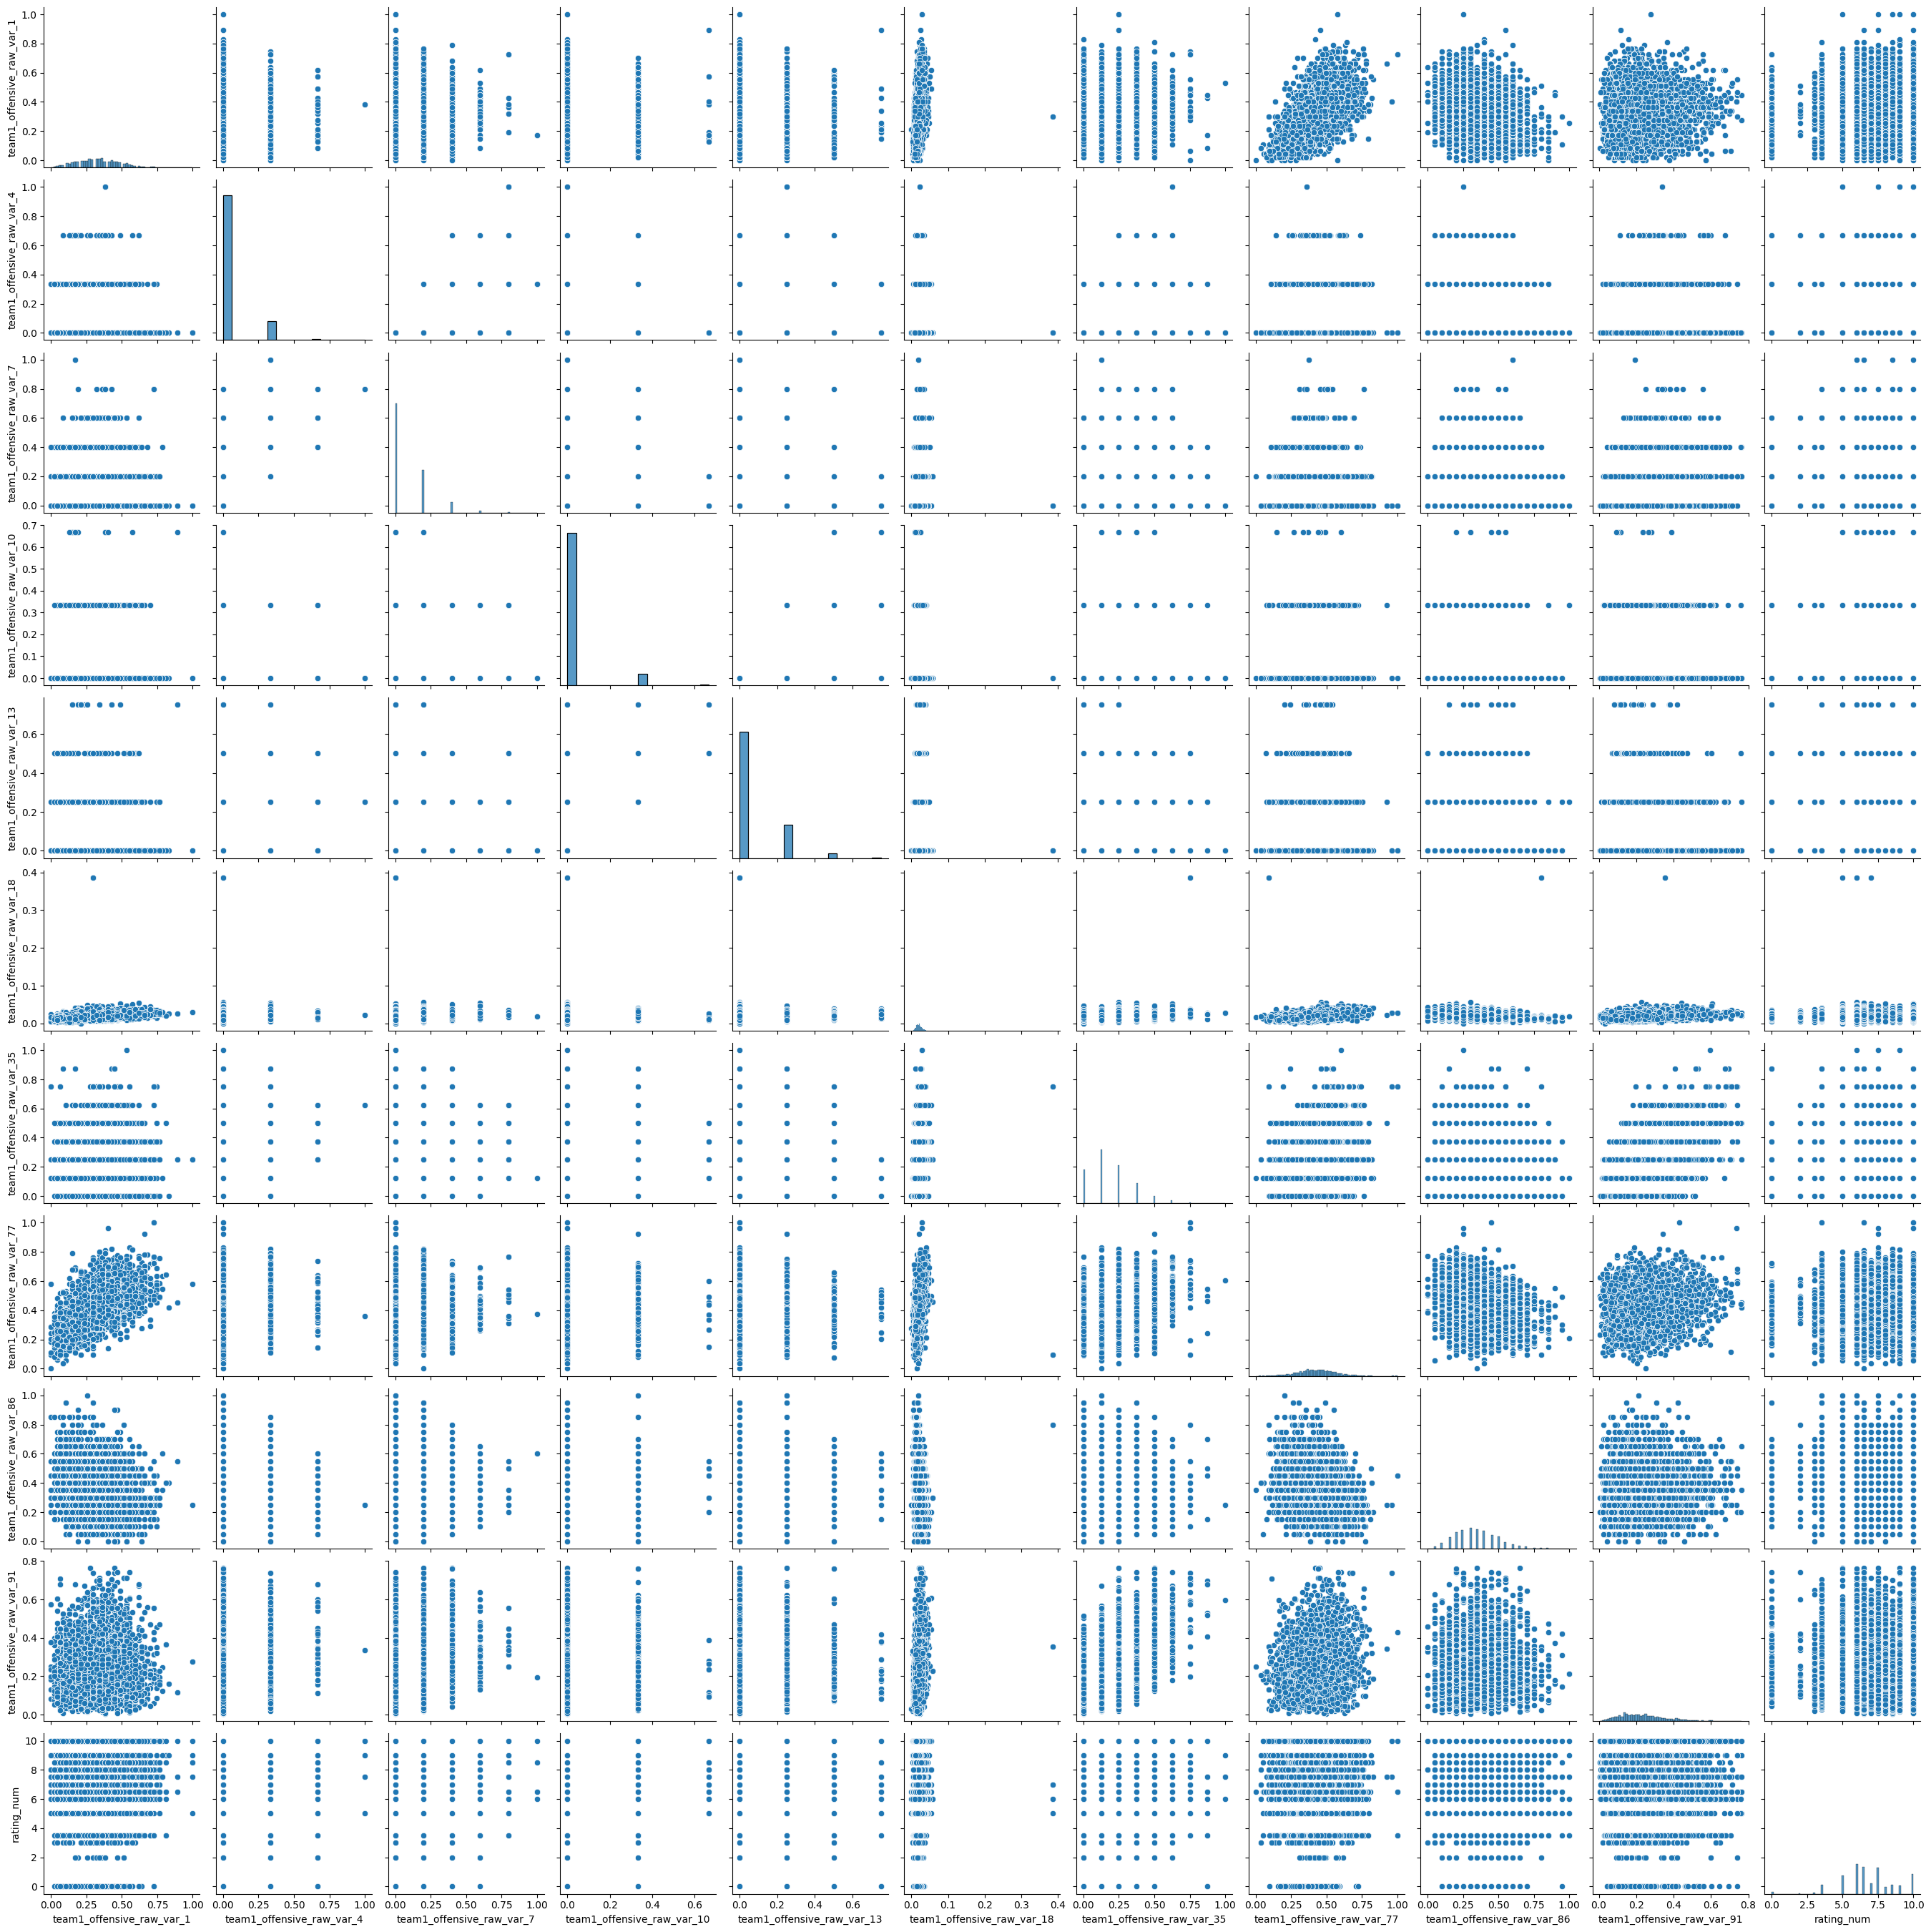

In [22]:
sns.pairplot(pd.concat([team1_raw_offensive, target], axis=1));

In [23]:
team2_raw_offensive = splitter.get_team_data_set(
    team_type=fds.TeamType.SECOND.value,
    stats_type=fds.StatsVariableType.RAW.value,
    var_type=fds.TeamVariableType.OFFENSIVE.value,
    add_common_cols=False
)

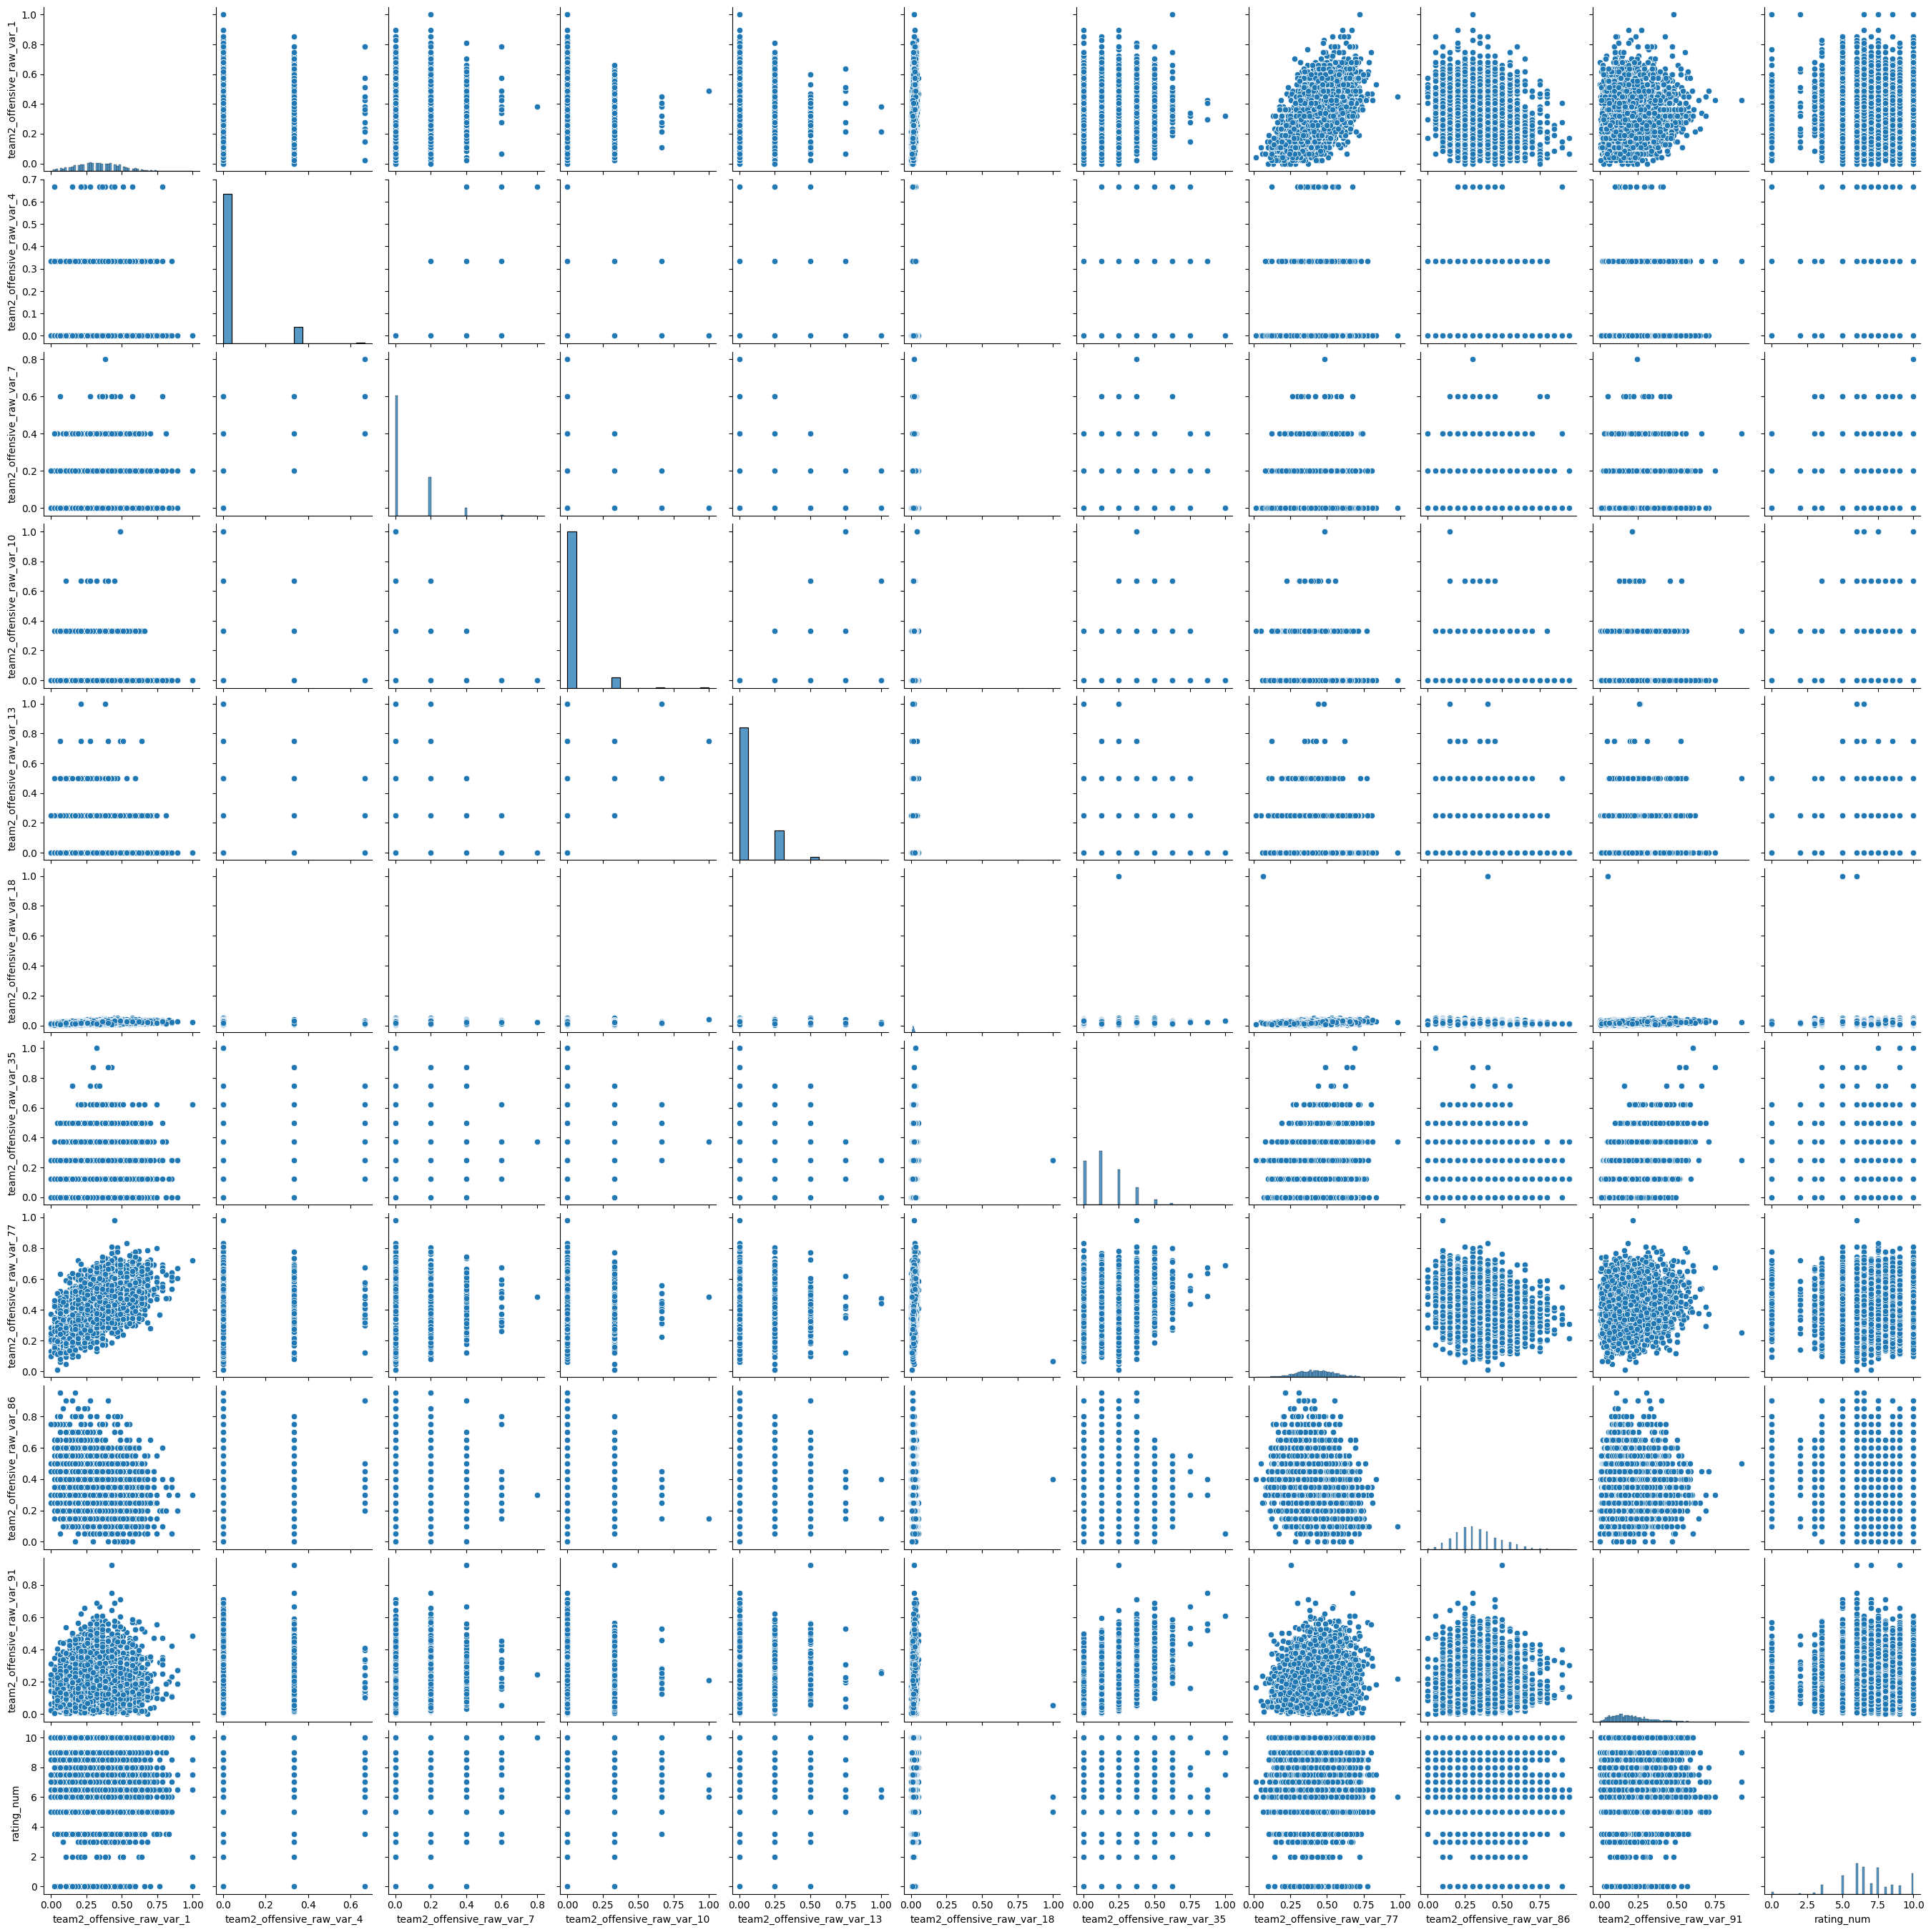

In [24]:
sns.pairplot(pd.concat([team2_raw_offensive, target], axis=1));

In [28]:
len(player_raw_defensive["player_defensive_raw_var_4"].unique())

15

In [17]:
train.head().filter(regex=("player.*")).columns

Index(['player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0', 'player_general_var_1',
       'player_general_var_2', 'player_general_var_3', 'player_general_var_4',
       'player_general_var_5',
       ...
       'player_general_derived_var_152', 'player_offensive_derived_var_153',
       'player_offensive_derived_var_154', 'player_offensive_derived_var_155',
       'player_general_derived_var_156', 'player_other_derived_var_157',
       'player_offensive_derived_var_158', 'player_offensive_derived_var_159',
       'player_other_derived_var_160', 'player_offensive_derived_var_161'],
      dtype='object', length=458)

In [7]:
test = pd.read_csv("../data/test.csv")

In [8]:
test.head()

row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  ...  \
0                4.0       0.317073           0.44                   0.0  ...   
1               11.0       0.560976           0.60                   0.0  ...   
2               19.0       0.195122           0.30                   0.0  ...   
3                9.0       0.341463           0.30                   0.0  ...   
4                4.0       0.585366           0.70                   0.2  ...   

   team2_defensive_derived_var_10  team2_offensive_derived_var_11  \
0                        0.268842                        0.190509   
1                        0.346640                        0.198072   
2                        0.351175                        0.177065   
3                        0.496021                        0.313902   
4                        0.396398                        0.191068   

   team2_offensive_derived_var_12  team2_offensive_derived_var_13  \
0                        0.311739                        0.628642   
1                        0.246104                        0.536949   
2                        0.262470                        0.650741   
3                        0.405065                        0.490855   
4                        0.042083                        0.838704   

   team2_offensive_derived_var_14  team2_defensive_derived_var_15  \
0                        0.405323                        0.309039   
1                        0.486006                        0.487637   
2                        0.567063                        0.486774   
3                        0.591251                        0.608131   
4                        0.689723                        0.522480   

   team2_offensive_derived_var_16  team2_defensive_derived_var_17  \
0                        0.114849                        0.454992   
1                        0.105279                        0.501402   
2                        0.062118                        0.251021   
3                        0.294538                        0.322264   
4                        0.090986                        0.437002   

   team2_offensive_derived_var_18  team2_offensive_derived_var_19  
0                        0.304133                        0.328816  
1                        0.381214                        0.499620  
2                        0.586227                        0.267774  
3                        0.685016                        0.293783  
4                        0.476399                        0.437500  

[5 rows x 799 columns]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB
